# Data

### Data Import

In [1]:
!pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pyLDAvis from https://files.pythonhosted.org/packages/6b/5a/66364c6799f2362bfb9b7100bc1ce6ffcdfe7f17e8d2e85a591bfe427643/pyLDAvis-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for funcy from https://files.pythonhosted.org/packages/d5/08/c2409cb01d5368dcfedcbaffa7d044cc8957d57a9d0855244a5eb4709d30/funcy-2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/2d/30/074bac7a25866a2807c1005c7852c0139ac22ba837871fc01f16df29b9dc/FuzzyTM-2.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/ed/ea/a3b120e251145dcdb10777f2bc5f18b1496fd999d705a178c1b0ad947ce1/pyFUME-0.3.4-py3-none-any.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/65/76/903324159e4a3566e518c558a

In [4]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   ----------- ---------------------------- 174.1/626.3 kB 2.1 MB/s eta 0:00:01
   -------------------------------- ------- 501.8/626.3 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 4.4 MB/s eta 0:00:00


In [5]:
# Loading primary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For text processing
import re
from textblob import TextBlob
import gensim
import logging
import tempfile
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models

In [9]:
df = pd.read_csv('Dataset 1 - Medibank.csv', index_col = "id")

### Data Assessment

In [10]:
df.columns

Index(['created_at', 'date', 'time', 'username', 'name', 'tweet', 'language',
       'hashtags'],
      dtype='object')

In [11]:
df.head()

,created_at,date,time,username,name,tweet,language,hashtags
id,,,,,,,,
1513321640431550474,2022-04-11 01:02:49+00:00,2022-04-11,01:02:49,parkesstreet,Bernie Cox,@AustralianLabor After the Fraser Government d...,en,[]
1513303462796271616,2022-04-10 23:50:36+00:00,2022-04-10,23:50:36,shanebakeract,Shane Baker,@LuckiePhil1 @vince05656201 @LiberalAus Actual...,en,[]
1513285115522457600,2022-04-10 22:37:41+00:00,2022-04-10,22:37:41,pceebee23,ceebee23,@kels_316 @AustralianLabor to be fair to both ...,en,[]
1513254396989108226,2022-04-10 20:35:37+00:00,2022-04-10,20:35:37,russputin2,"Russell Drysdale # IStandbyDan, Louise &Brittany","@GregHuntMP Actually Greg, Labor invented the ...",en,[]
1513127072264519686,2022-04-10 12:09:41+00:00,2022-04-10,12:09:41,gabrielschind13,Gab,@Rheenie_85 So we don't have education for all...,en,[]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21067 entries, 1513321640431550474 to 815390599851307008
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  21067 non-null  object
 1   date        21067 non-null  object
 2   time        21063 non-null  object
 3   username    21063 non-null  object
 4   name        21063 non-null  object
 5   tweet       21063 non-null  object
 6   language    21059 non-null  object
 7   hashtags    21059 non-null  object
dtypes: object(8)
memory usage: 1.4+ MB


In [13]:
df.isnull().sum()

created_at    0
date          0
time          4
username      4
name          4
tweet         4
language      8
hashtags      8
dtype: int64

In [14]:
df.dropna(inplace=True) # drop the rows with null values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21059 entries, 1513321640431550474 to 815390599851307008
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  21059 non-null  object
 1   date        21059 non-null  object
 2   time        21059 non-null  object
 3   username    21059 non-null  object
 4   name        21059 non-null  object
 5   tweet       21059 non-null  object
 6   language    21059 non-null  object
 7   hashtags    21059 non-null  object
dtypes: object(8)
memory usage: 1.4+ MB


In [16]:
df = df[['date', 'time', 'tweet', 'language']] # drop unncessary columns

In [17]:
df.head()

,date,time,tweet,language
id,,,,
1513321640431550474,2022-04-11,01:02:49,@AustralianLabor After the Fraser Government d...,en
1513303462796271616,2022-04-10,23:50:36,@LuckiePhil1 @vince05656201 @LiberalAus Actual...,en
1513285115522457600,2022-04-10,22:37:41,@kels_316 @AustralianLabor to be fair to both ...,en
1513254396989108226,2022-04-10,20:35:37,"@GregHuntMP Actually Greg, Labor invented the ...",en
1513127072264519686,2022-04-10,12:09:41,@Rheenie_85 So we don't have education for all...,en


# Pre-Processing

### Lowercase Transformation

In [18]:
df = df[df['language'] == 'en'] # select english language only

In [19]:
df['tweet'] = df['tweet'].str.lower() # transform tweets into lowercase

In [20]:
df.tail()

,date,time,tweet,language
id,,,,
815701651076091904,2017-01-01,23:30:03,make the perfect #smoothie bowl in 5 easy step...,en
815671452896784384,2017-01-01,21:30:03,simple tricks to make your plane ride more com...,en
815526386689404928,2017-01-01,11:53:36,"medibank is weird, like- where is my colour wh...",en
815419270611935232,2017-01-01,04:47:58,why is brett lee batting in the 2nd @medibank ...,en
815399667819315201,2017-01-01,03:30:04,the #detox recipe that will help you feel bran...,en


### Remove multi-space and characters followed by '@' Sign

In [21]:
def remove_twitter_ids(tweet):
  mention_removed_tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(tweet)) # remove any sequence of characters followed by '@' sign
  spaces_removed = re.sub(r"\s\s+", " ", str(mention_removed_tweet)) # remove multiple spaces
  return spaces_removed

df['tweet'] = df['tweet'].apply(remove_twitter_ids)

### Remove URL

In [22]:
import re

url_pattern = re.compile(r'https?://\S+')
df['tweet'] = df['tweet'].apply(lambda x: url_pattern.sub('', x))

df.tail()

,date,time,tweet,language
id,,,,
815701651076091904,2017-01-01,23:30:03,make the perfect smoothie bowl in 5 easy steps...,en
815671452896784384,2017-01-01,21:30:03,simple tricks to make your plane ride more com...,en
815526386689404928,2017-01-01,11:53:36,medibank is weird like where is my colour whee...,en
815419270611935232,2017-01-01,04:47:58,why is brett lee batting in the 2nd ahm ad did...,en
815399667819315201,2017-01-01,03:30:04,the detox recipe that will help you feel brand...,en


### Remove punctuations

In [23]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]','')

<>:1: DeprecationWarning: invalid escape sequence '\w'
<>:1: DeprecationWarning: invalid escape sequence '\w'
C:\Users\tangt\AppData\Local\Temp\ipykernel_5548\915134959.py:1: DeprecationWarning: invalid escape sequence '\w'
  df['tweet'] = df['tweet'].str.replace('[^\w\s]','')


### Remove Duplicates

In [24]:
duplicate_count = len(df['tweet'])-len(df['tweet'].drop_duplicates()) # check duplicate tweet counts
print('duplicate count:', duplicate_count)
print('total records before remove duplicates:', df.shape[0])

duplicate count: 2075
total records before remove duplicates: 20353


In [25]:
df = df.drop_duplicates(subset='tweet', keep="first") # drop duplicates (keep the last tweet of each of the duplicates)
print('updated record count:', df.shape[0])

updated record count: 18278


In [26]:
df.tail()

,date,time,tweet,language
id,,,,
815701651076091904,2017-01-01,23:30:03,make the perfect smoothie bowl in 5 easy steps...,en
815671452896784384,2017-01-01,21:30:03,simple tricks to make your plane ride more com...,en
815526386689404928,2017-01-01,11:53:36,medibank is weird like where is my colour whee...,en
815419270611935232,2017-01-01,04:47:58,why is brett lee batting in the 2nd ahm ad did...,en
815399667819315201,2017-01-01,03:30:04,the detox recipe that will help you feel brand...,en


### Remove Digits

In [27]:
def remove_digits(tweet): # remove digits
  return " ".join(w for w in tweet.split() if not w.isdigit())

df['tweet'] = df['tweet'].apply(remove_digits)

In [28]:
df.tail()

,date,time,tweet,language
id,,,,
815701651076091904,2017-01-01,23:30:03,make the perfect smoothie bowl in easy steps r...,en
815671452896784384,2017-01-01,21:30:03,simple tricks to make your plane ride more com...,en
815526386689404928,2017-01-01,11:53:36,medibank is weird like where is my colour whee...,en
815419270611935232,2017-01-01,04:47:58,why is brett lee batting in the 2nd ahm ad did...,en
815399667819315201,2017-01-01,03:30:04,the detox recipe that will help you feel brand...,en


### Stemming

Stemming is the removal of prefix, suffix etc, to derive the base form of a word.

In [29]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming_function(sent):
  word_list = sent.split()
  stemmed_word_list = [stemmer.stem(word) for word in word_list]
  stemmed_tweet = " ".join(stemmed_word_list)
  return stemmed_tweet

df['tweet_stemmed'] = df['tweet'].apply(stemming_function)

df.head(10)

,date,time,tweet,language,tweet_stemmed
id,,,,,
1513321640431550474,2022-04-11,01:02:49,after the fraser government destroyed the orig...,en,after the fraser govern destroy the origin med...
1513303462796271616,2022-04-10,23:50:36,actually whitlam made medibank which after fra...,en,actual whitlam made medibank which after frase...
1513285115522457600,2022-04-10,22:37:41,to be fair to both greens and labor the proble...,en,to be fair to both green and labor the problem...
1513254396989108226,2022-04-10,20:35:37,actually greg labor invented the pbs years ago...,en,actual greg labor invent the pb year ago under...
1513127072264519686,2022-04-10,12:09:41,so we dont have education for all or medibank ...,en,so we dont have educ for all or medibank now m...
1513108834130169858,2022-04-10,10:57:12,its frankly amazing how quickly the entire sec...,en,it frankli amaz how quickli the entir sector l...
1513049323310878731,2022-04-10,07:00:44,does slow metabolism cause weight gain mediban...,en,doe slow metabol caus weight gain medibank eas...
1513009392626462721,2022-04-10,04:22:04,free university and tafe medibank opposed viet...,en,free univers and tafe medibank oppos vietnam w...
1512936052494794755,2022-04-09,23:30:38,labor has always been the party focused on hea...,en,labor ha alway been the parti focus on health ...


### Lemmatization

Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language.

In [30]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmtizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tangt\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tangt\AppData\Roaming\nltk_data...


In [31]:
def lemmatize_function(sent):
  word_list = sent.split()
  lemma_word_list = [lemmtizer.lemmatize(word) for word in word_list]
  lemma_tweet = " ".join(lemma_word_list)
  return lemma_tweet

df['tweet_lemmatized'] = df['tweet'].apply(lemmatize_function)

df.head(10)

,date,time,tweet,language,tweet_stemmed,tweet_lemmatized
id,,,,,,
1513321640431550474,2022-04-11,01:02:49,after the fraser government destroyed the orig...,en,after the fraser govern destroy the origin med...,after the fraser government destroyed the orig...
1513303462796271616,2022-04-10,23:50:36,actually whitlam made medibank which after fra...,en,actual whitlam made medibank which after frase...,actually whitlam made medibank which after fra...
1513285115522457600,2022-04-10,22:37:41,to be fair to both greens and labor the proble...,en,to be fair to both green and labor the problem...,to be fair to both green and labor the problem...
1513254396989108226,2022-04-10,20:35:37,actually greg labor invented the pbs years ago...,en,actual greg labor invent the pb year ago under...,actually greg labor invented the pb year ago u...
1513127072264519686,2022-04-10,12:09:41,so we dont have education for all or medibank ...,en,so we dont have educ for all or medibank now m...,so we dont have education for all or medibank ...
1513108834130169858,2022-04-10,10:57:12,its frankly amazing how quickly the entire sec...,en,it frankli amaz how quickli the entir sector l...,it frankly amazing how quickly the entire sect...
1513049323310878731,2022-04-10,07:00:44,does slow metabolism cause weight gain mediban...,en,doe slow metabol caus weight gain medibank eas...,doe slow metabolism cause weight gain medibank...
1513009392626462721,2022-04-10,04:22:04,free university and tafe medibank opposed viet...,en,free univers and tafe medibank oppos vietnam w...,free university and tafe medibank opposed viet...
1512936052494794755,2022-04-09,23:30:38,labor has always been the party focused on hea...,en,labor ha alway been the parti focus on health ...,labor ha always been the party focused on heal...


In [32]:
df[['tweet', 'tweet_stemmed', 'tweet_lemmatized']].head(10)

,tweet,tweet_stemmed,tweet_lemmatized
id,,,
1513321640431550474,after the fraser government destroyed the orig...,after the fraser govern destroy the origin med...,after the fraser government destroyed the orig...
1513303462796271616,actually whitlam made medibank which after fra...,actual whitlam made medibank which after frase...,actually whitlam made medibank which after fra...
1513285115522457600,to be fair to both greens and labor the proble...,to be fair to both green and labor the problem...,to be fair to both green and labor the problem...
1513254396989108226,actually greg labor invented the pbs years ago...,actual greg labor invent the pb year ago under...,actually greg labor invented the pb year ago u...
1513127072264519686,so we dont have education for all or medibank ...,so we dont have educ for all or medibank now m...,so we dont have education for all or medibank ...
1513108834130169858,its frankly amazing how quickly the entire sec...,it frankli amaz how quickli the entir sector l...,it frankly amazing how quickly the entire sect...
1513049323310878731,does slow metabolism cause weight gain mediban...,doe slow metabol caus weight gain medibank eas...,doe slow metabolism cause weight gain medibank...
1513009392626462721,free university and tafe medibank opposed viet...,free univers and tafe medibank oppos vietnam w...,free university and tafe medibank opposed viet...
1512936052494794755,labor has always been the party focused on hea...,labor ha alway been the parti focus on health ...,labor ha always been the party focused on heal...


Lemmatization algorithm seems to be working better in this case when compared to the stemming.

# Stop-word and Common word Removal

### Stop-word Removal

Stopwords are deemed irrelevant for NLP purposes because they occur frequently in the language. Therefore, we will omit the stopwords as a pre-processing step.

In [33]:
# Load NLTK library
import nltk

# Download the stopwords to the nltk library
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tangt\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [34]:
# get the list of all stopwords from the library
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
stop.remove('not')

In [36]:
df['tweet_lemmatized'] = df['tweet_lemmatized'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,date,time,tweet,language,tweet_stemmed,tweet_lemmatized
id,,,,,,
1513321640431550474,2022-04-11,01:02:49,after the fraser government destroyed the orig...,en,after the fraser govern destroy the origin med...,fraser government destroyed original medibank ...
1513303462796271616,2022-04-10,23:50:36,actually whitlam made medibank which after fra...,en,actual whitlam made medibank which after frase...,actually whitlam made medibank fraser done wor...
1513285115522457600,2022-04-10,22:37:41,to be fair to both greens and labor the proble...,en,to be fair to both green and labor the problem...,fair green labor problem dental medicare ha al...
1513254396989108226,2022-04-10,20:35:37,actually greg labor invented the pbs years ago...,en,actual greg labor invent the pb year ago under...,actually greg labor invented pb year ago pm cu...
1513127072264519686,2022-04-10,12:09:41,so we dont have education for all or medibank ...,en,so we dont have educ for all or medibank now m...,dont education medibank medicare nbn slow expe...


In [37]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [38]:
df['tweet_lemmatized'] = df['tweet_lemmatized'].apply(lambda x: " ".join(x for x in x.split() if x not in emojis))
df.head(5)

,date,time,tweet,language,tweet_stemmed,tweet_lemmatized
id,,,,,,
1513321640431550474,2022-04-11,01:02:49,after the fraser government destroyed the orig...,en,after the fraser govern destroy the origin med...,fraser government destroyed original medibank ...
1513303462796271616,2022-04-10,23:50:36,actually whitlam made medibank which after fra...,en,actual whitlam made medibank which after frase...,actually whitlam made medibank fraser done wor...
1513285115522457600,2022-04-10,22:37:41,to be fair to both greens and labor the proble...,en,to be fair to both green and labor the problem...,fair green labor problem dental medicare ha al...
1513254396989108226,2022-04-10,20:35:37,actually greg labor invented the pbs years ago...,en,actual greg labor invent the pb year ago under...,actually greg labor invented pb year ago pm cu...
1513127072264519686,2022-04-10,12:09:41,so we dont have education for all or medibank ...,en,so we dont have educ for all or medibank now m...,dont education medibank medicare nbn slow expe...


### Common words and Rare words

Aside from stopwords, some words appear commonly or rarely in an entire body of text. Based on the analytics requirement, we have decided to remove some of the common words that would not affect the analysis.

In [39]:
word_frequency = pd.Series(' '.join(df['tweet_lemmatized']).split()).value_counts()

In [40]:
word_frequency[:10] # most common

medibank     9901
health       3389
private      2474
wa           2370
amp          1854
not          1814
u            1800
medicare     1777
insurance    1538
hi           1356
Name: count, dtype: int64

In [41]:
word_frequency[-10:] # least common

tiresome           1
underpinning       1
conflicted         1
francis            1
extraordinarily    1
neutralised        1
nooptout           1
socialcontract     1
bringitback        1
bigquestions       1
Name: count, dtype: int64

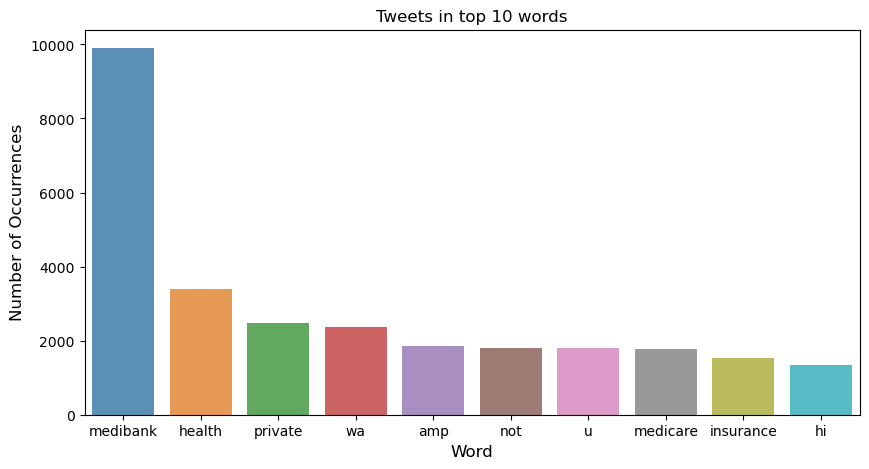

In [42]:
word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

In [44]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 660.6 kB/s eta 0:00:01
   -------------------------------- ------- 245.8/300.2 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [45]:
from PIL import Image
from wordcloud import WordCloud

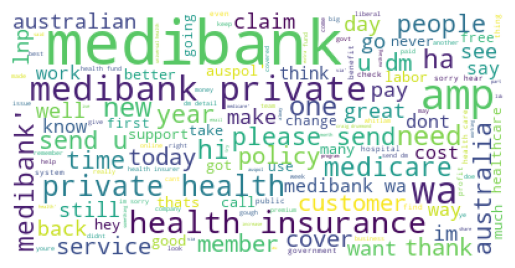

In [47]:
corpus = list(df['tweet_lemmatized'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Remove Common Words

In [48]:
new_words_to_remove = ["medibank", "twitter", "com", "hi", "hey"]

In [49]:
df['tweet_lemmatized'] = df['tweet_lemmatized'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove))
df.head(10)

,date,time,tweet,language,tweet_stemmed,tweet_lemmatized
id,,,,,,
1513321640431550474,2022-04-11,01:02:49,after the fraser government destroyed the orig...,en,after the fraser govern destroy the origin med...,fraser government destroyed original liberal p...
1513303462796271616,2022-04-10,23:50:36,actually whitlam made medibank which after fra...,en,actual whitlam made medibank which after frase...,actually whitlam made fraser done worst wa res...
1513285115522457600,2022-04-10,22:37:41,to be fair to both greens and labor the proble...,en,to be fair to both green and labor the problem...,fair green labor problem dental medicare ha al...
1513254396989108226,2022-04-10,20:35:37,actually greg labor invented the pbs years ago...,en,actual greg labor invent the pb year ago under...,actually greg labor invented pb year ago pm cu...
1513127072264519686,2022-04-10,12:09:41,so we dont have education for all or medibank ...,en,so we dont have educ for all or medibank now m...,dont education medicare nbn slow expensive obs...
1513108834130169858,2022-04-10,10:57:12,its frankly amazing how quickly the entire sec...,en,it frankli amaz how quickli the entir sector l...,frankly amazing quickly entire sector lubed be...
1513049323310878731,2022-04-10,07:00:44,does slow metabolism cause weight gain mediban...,en,doe slow metabol caus weight gain medibank eas...,doe slow metabolism cause weight gain east elm...
1513009392626462721,2022-04-10,04:22:04,free university and tafe medibank opposed viet...,en,free univers and tafe medibank oppos vietnam w...,free university tafe opposed vietnam war polic...
1512936052494794755,2022-04-09,23:30:38,labor has always been the party focused on hea...,en,labor ha alway been the parti focus on health ...,labor ha always party focused health insider b...


In [50]:
df = df[['date', 'time', 'tweet_lemmatized']]
df.head()

,date,time,tweet_lemmatized
id,,,
1513321640431550474,2022-04-11,01:02:49,fraser government destroyed original liberal p...
1513303462796271616,2022-04-10,23:50:36,actually whitlam made fraser done worst wa res...
1513285115522457600,2022-04-10,22:37:41,fair green labor problem dental medicare ha al...
1513254396989108226,2022-04-10,20:35:37,actually greg labor invented pb year ago pm cu...
1513127072264519686,2022-04-10,12:09:41,dont education medicare nbn slow expensive obs...


# Frequency Analysis

In [51]:
word_frequency = pd.Series(' '.join(df['tweet_lemmatized']).split()).value_counts()

In [52]:
word_frequency[:10]

health       3389
private      2474
wa           2370
amp          1854
not          1814
u            1800
medicare     1777
insurance    1538
get          1200
thanks       1154
Name: count, dtype: int64

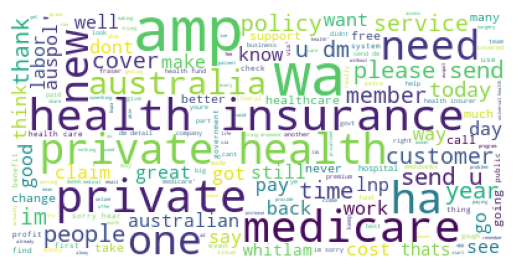

In [53]:
corpus = list(df['tweet_lemmatized'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Text Feature Extraction

### Bigrams

In [54]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tangt\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [55]:
# This function will generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(2, 2)):

    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0)

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

In [57]:
bigrams_medibank = get_ngrams(df['tweet_lemmatized'].tolist(), ngram_range=(2, 2))

In [58]:
bigrams_medibank

[('health insurance', 880),
 ('private health', 706),
 ('send dm', 622),
 ('please send', 583),
 ('health care', 259),
 ('sorry hear', 256),
 ('health insurer', 241),
 ('im sorry', 218),
 ('dm detail', 215),
 ('health fund', 205),
 ('craig drummond', 188),
 ('universal health', 178),
 ('melbourne marathon', 153),
 ('private message', 143),
 ('medicare wa', 141),
 ('premium increase', 138),
 ('kind regard', 128),
 ('ceo craig', 122),
 ('health system', 121),
 ('pet insurance', 112),
 ('gough whitlam', 111),
 ('would like', 105),
 ('fossil fuel', 104),
 ('mental health', 103),
 ('live chat', 103),
 ('let know', 102),
 ('direct message', 101),
 ('health cover', 100),
 ('south bank', 97),
 ('thanks anna', 94),
 ('last year', 91),
 ('better health', 89),
 ('youd like', 89),
 ('could please', 89),
 ('public health', 89),
 ('customer service', 88),
 ('feel good', 85),
 ('bob hawke', 85),
 ('marathon festival', 85),
 ('insurance company', 84),
 ('full name', 82),
 ('help please', 81),
 ('trave

In [59]:
bigrams_medibank_df = pd.DataFrame(bigrams_medibank)
bigrams_medibank_df.columns=["Bi-gram", "Freq"]

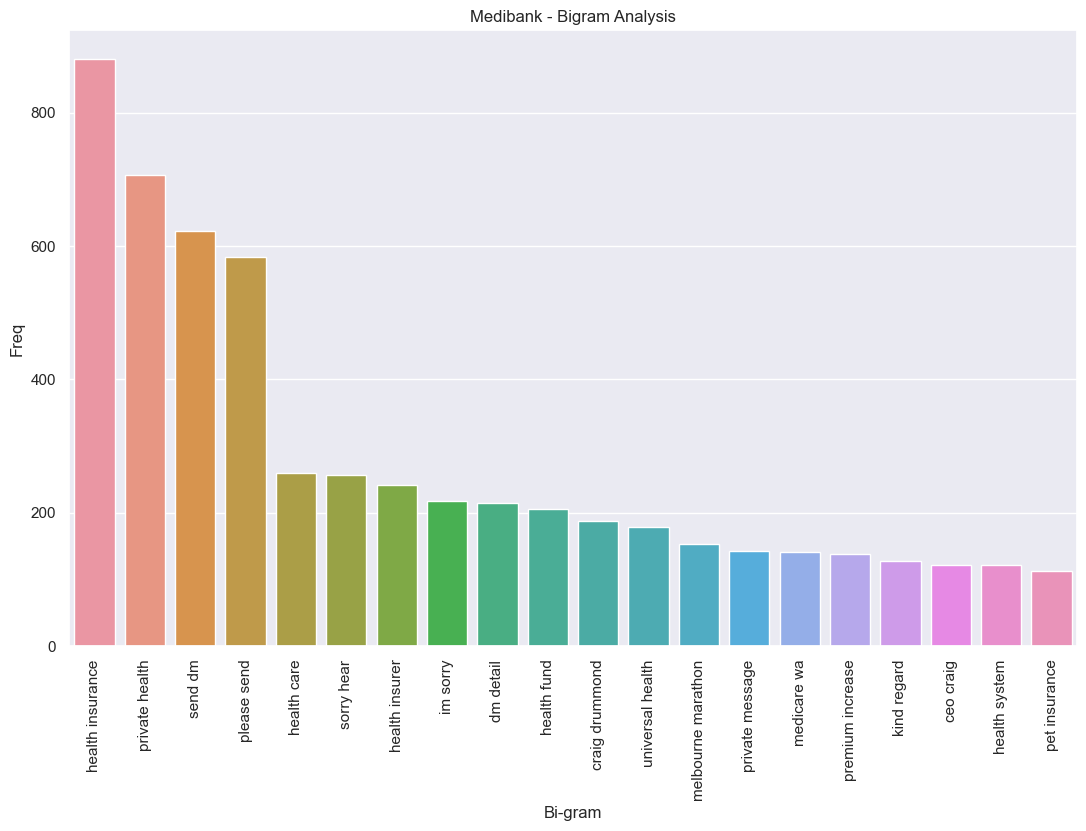

In [60]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=bigrams_medibank_df[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)
plt.title('Medibank - Bigram Analysis')
plt.show()

In [61]:
trigrams_medibank = get_ngrams(df['tweet_lemmatized'].tolist(), ngram_range=(3, 3))

In [62]:
trigrams_medibank

[('please send dm', 455),
 ('private health insurance', 345),
 ('send dm detail', 179),
 ('ceo craig drummond', 120),
 ('universal health care', 119),
 ('private health insurer', 107),
 ('melbourne marathon festival', 84),
 ('kind regard robin', 78),
 ('feel good program', 74),
 ('send private message', 73),
 ('im sorry hear', 72),
 ('sorry hear experience', 69),
 ('send direct message', 69),
 ('south bank piazza', 63),
 ('thanks getting touch', 59),
 ('experience please send', 59),
 ('please send private', 56),
 ('could please send', 54),
 ('health insurance premium', 50),
 ('free forever thanks', 49),
 ('athletesfoot blackmores beawellbeing', 49),
 ('blackmores beawellbeing parkrun', 49),
 ('beawellbeing parkrun loveparkrun', 49),
 ('parkrun loveparkrun parkrunday', 49),
 ('help please send', 48),
 ('parkrun free forever', 48),
 ('forever thanks athletesfoot', 48),
 ('thanks athletesfoot blackmores', 48),
 ('loveparkrun parkrunday findyourmotivation', 47),
 ('name date birth', 46),
 

In [63]:
trigrams_medibank_df = pd.DataFrame(trigrams_medibank)
trigrams_medibank_df.columns=["Tri-gram", "Freq"]

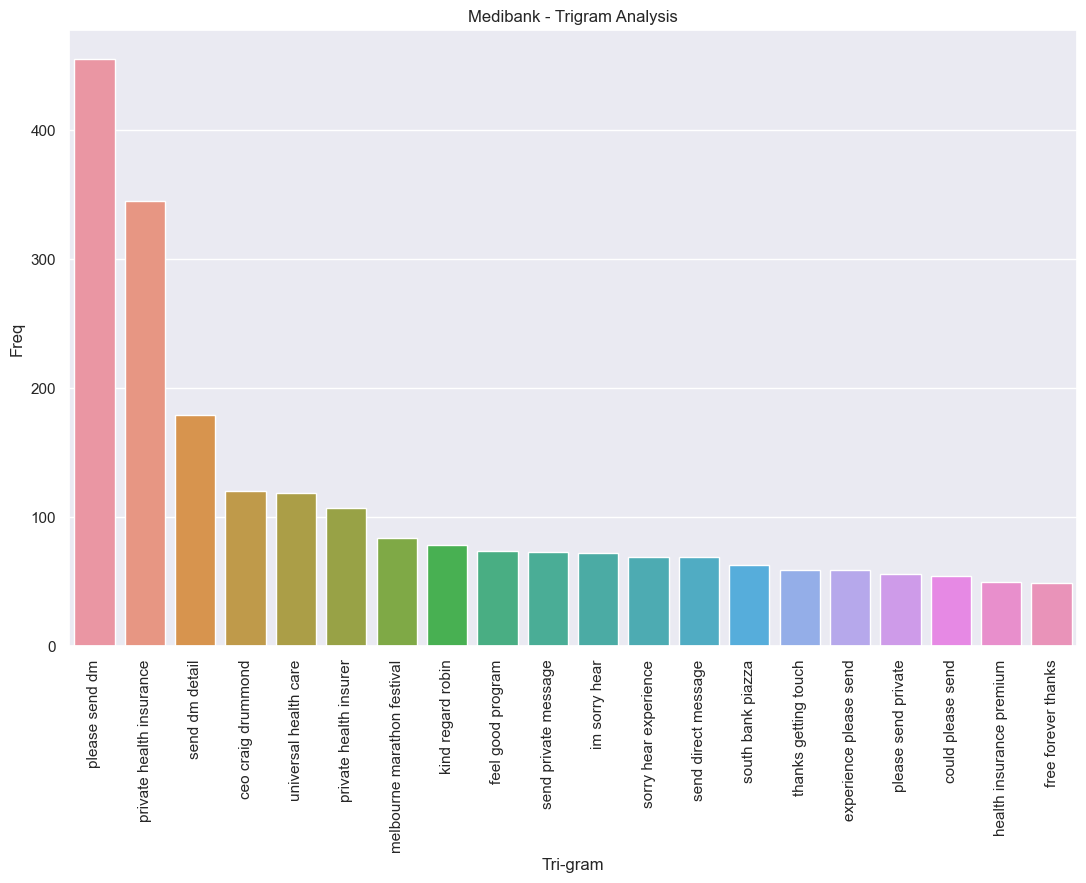

In [64]:
top_trigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=trigrams_medibank_df[:top_trigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=90)
plt.title('Medibank - Trigram Analysis')
plt.show()

### Bag of words

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1), analyzer = "word")

In [68]:
X_bow = bow.fit_transform(df['tweet_lemmatized'])

In [69]:
df['tweet_lemmatized'].head()

id
1513321640431550474    fraser government destroyed original liberal p...
1513303462796271616    actually whitlam made fraser done worst wa res...
1513285115522457600    fair green labor problem dental medicare ha al...
1513254396989108226    actually greg labor invented pb year ago pm cu...
1513127072264519686    dont education medicare nbn slow expensive obs...
Name: tweet_lemmatized, dtype: object

In [58]:
print(X_bow)

  (0, 342)	1
  (0, 380)	1
  (0, 233)	1
  (0, 643)	1
  (0, 521)	1
  (0, 640)	1
  (0, 926)	1
  (0, 864)	1
  (0, 130)	1
  (1, 342)	1
  (1, 17)	1
  (1, 964)	1
  (1, 549)	1
  (1, 388)	1
  (1, 256)	1
  (1, 400)	1
  (1, 573)	1
  (2, 643)	1
  (2, 573)	1
  (2, 307)	1
  (2, 496)	1
  (2, 713)	1
  (2, 228)	2
  (2, 395)	2
  (2, 37)	1
  :	:
  (18271, 782)	1
  (18272, 233)	1
  (18272, 135)	1
  (18272, 404)	1
  (18272, 376)	1
  (18272, 433)	1
  (18272, 511)	1
  (18273, 551)	1
  (18273, 265)	1
  (18273, 750)	1
  (18274, 551)	1
  (18274, 911)	1
  (18274, 823)	1
  (18275, 524)	1
  (18276, 362)	1
  (18276, 30)	1
  (18276, 623)	1
  (18276, 236)	1
  (18276, 18)	2
  (18276, 1)	1
  (18277, 413)	1
  (18277, 315)	1
  (18277, 616)	1
  (18277, 111)	1
  (18277, 750)	1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Term frequency - Inverse Document Frequency (TF-IDF)

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [71]:
tf_idf = vectorizer.fit_transform(df['tweet_lemmatized'])

In [72]:
print(vectorizer.get_feature_names_out())

['000s' '0057dividend' '0303am' ... 'zyddhomedecor' 'zylyz' 'zyzzyvamedia']


In [73]:
print(tf_idf[:5])

  (0, 11921)	0.35629964908941614
  (0, 20019)	0.34330856968951246
  (0, 3460)	0.27211284454024715
  (0, 19086)	0.18970112432398595
  (0, 9190)	0.38457606471452266
  (0, 20352)	0.20684741920300698
  (0, 13969)	0.2776527658268656
  (0, 14722)	0.396311837544136
  (0, 11412)	0.21184888831853507
  (0, 14036)	0.22686636905353305
  (0, 5670)	0.2407208509380427
  (0, 8546)	0.1853858487684868
  (0, 7917)	0.17792243276911285
  (1, 12392)	0.20813504135853209
  (1, 9015)	0.27488509138052897
  (1, 16680)	0.44603948190556597
  (1, 20887)	0.19678707861597422
  (1, 21495)	0.42385352671258486
  (1, 6156)	0.31821187840188203
  (1, 11873)	0.31845687476068907
  (1, 21221)	0.26628150962182706
  (1, 912)	0.3492199986263444
  (1, 7917)	0.26125806172144533
  (2, 4858)	0.19175511340200688
  (2, 3526)	0.13057520636370273
  :	:
  (3, 8562)	0.13186105433961864
  (3, 21230)	0.14966036931006088
  (3, 8533)	0.12661207942502486
  (3, 5113)	0.23050046921041176
  (3, 14942)	0.15133329259771702
  (3, 1141)	0.14895061748

# Temporal Analysis

### Date

In [74]:
df_temp = df[['date','tweet_lemmatized']]

In [75]:
df_temp = df_temp.groupby(['date'])['tweet_lemmatized'].count().reset_index(name='tweet_count').set_index('date')

df_temp

,tweet_count
date,
2017-01-01,5
2017-01-02,8
2017-01-03,15
2017-01-04,33
2017-01-05,33
...,...
2022-04-07,7
2022-04-08,7
2022-04-09,4


Text(0.5, 1.0, 'Tweets Count by Date')

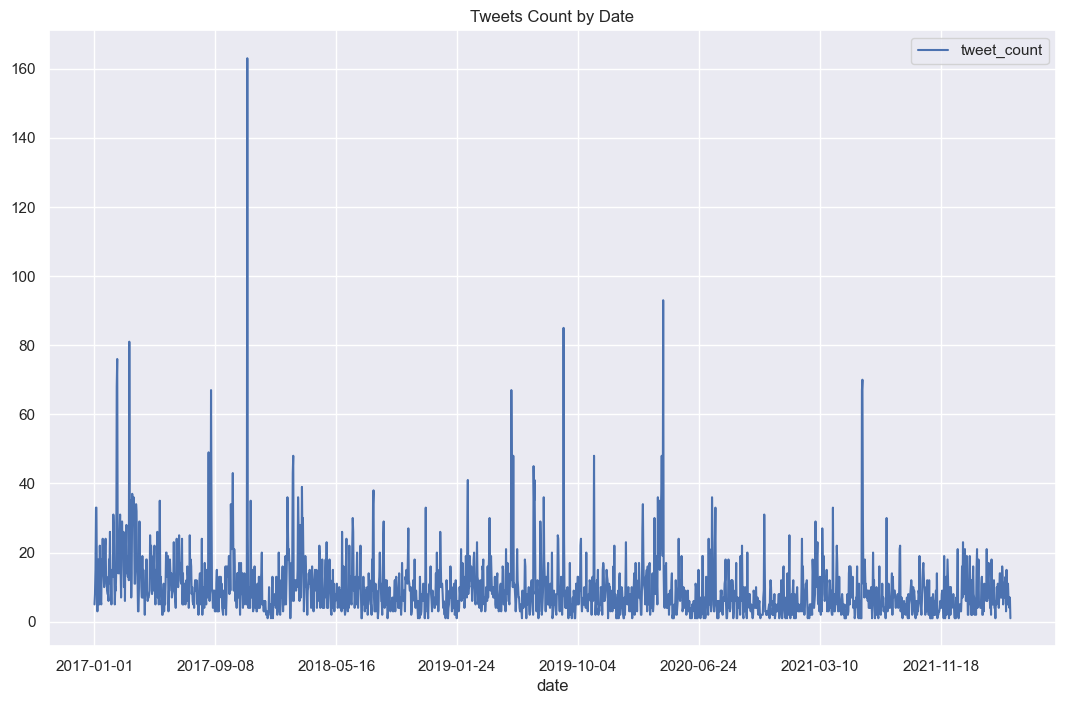

In [76]:
ax = df_temp.plot()
plt.savefig('temporal_analysis.png', dpi=800)
plt.title('Tweets Count by Date')

### Time

In [77]:
df_temp = df[['time','tweet_lemmatized']]

print(df_temp)

                         time  \
id                              
1513321640431550474  01:02:49   
1513303462796271616  23:50:36   
1513285115522457600  22:37:41   
1513254396989108226  20:35:37   
1513127072264519686  12:09:41   
...                       ...   
815701651076091904   23:30:03   
815671452896784384   21:30:03   
815526386689404928   11:53:36   
815419270611935232   04:47:58   
815399667819315201   03:30:04   

                                                      tweet_lemmatized  
id                                                                      
1513321640431550474  fraser government destroyed original liberal p...  
1513303462796271616  actually whitlam made fraser done worst wa res...  
1513285115522457600  fair green labor problem dental medicare ha al...  
1513254396989108226  actually greg labor invented pb year ago pm cu...  
1513127072264519686  dont education medicare nbn slow expensive obs...  
...                                                        

C:\Users\tangt\AppData\Local\Temp\ipykernel_5548\1355638906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['time'] = pd.to_datetime(df_temp['time'], format='%H:%M:%S')


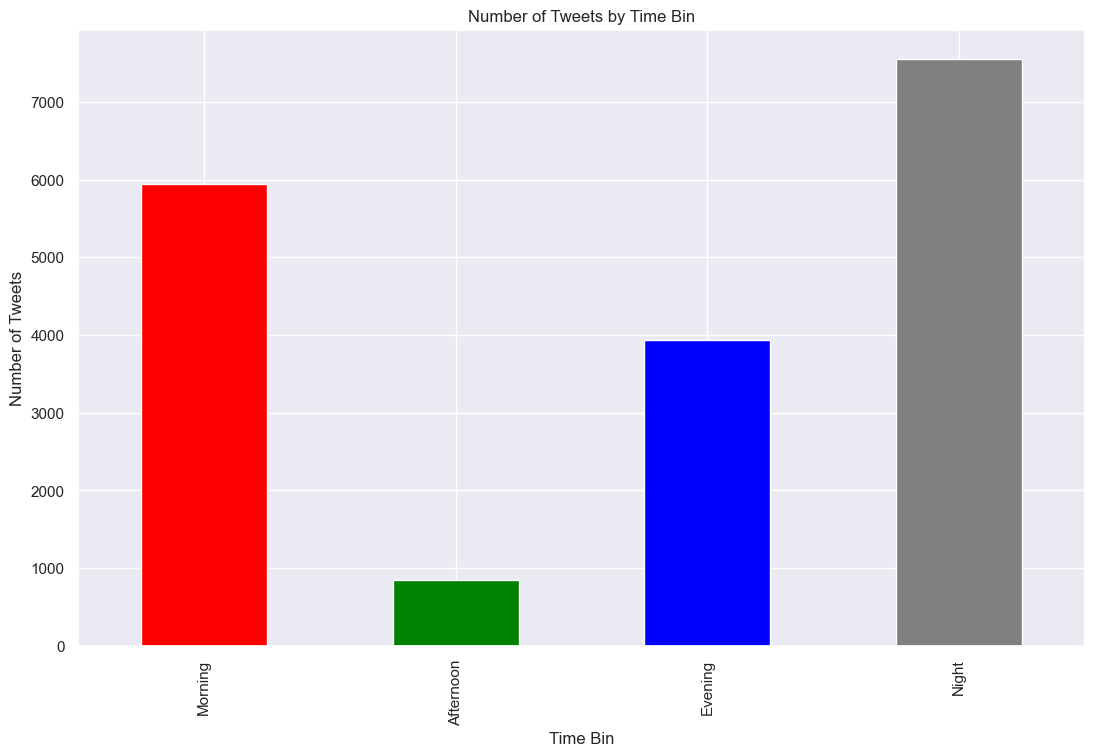

In [78]:
df_temp['time'] = pd.to_datetime(df_temp['time'], format='%H:%M:%S')

df_temp['time_bin'] = df_temp['time'].apply(lambda x: 'Morning' if 6 <= x.hour < 13 else ('Afternoon' if 13 <= x.hour < 18 else ('Evening' if 18 <= x.hour < 24 else 'Night')))

time_bin_counts = df_temp.groupby('time_bin')['tweet_lemmatized'].count()

time_bin_counts = time_bin_counts.reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

time_bin_counts.plot(kind='bar', color=['red', 'green', 'blue', 'grey'])
plt.xlabel('Time Bin')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Time Bin')
plt.show()

# Sentiment over Time

### Sentiment on overall data

In [79]:
df['sentiment'] = df['tweet_lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [81]:
df[['tweet_lemmatized', 'sentiment']].head(50)

,tweet_lemmatized,sentiment
id,,
1513321640431550474,fraser government destroyed original liberal p...,0.125000
1513303462796271616,actually whitlam made fraser done worst wa res...,-0.500000
1513285115522457600,fair green labor problem dental medicare ha al...,0.218750
1513254396989108226,actually greg labor invented pb year ago pm cu...,-0.033333
1513127072264519686,dont education medicare nbn slow expensive obs...,-0.400000
1513108834130169858,frankly amazing quickly entire sector lubed be...,0.300000
1513049323310878731,doe slow metabolism cause weight gain east elm...,-0.300000
1513009392626462721,free university tafe opposed vietnam war polic...,0.216667
1512936052494794755,labor ha always party focused health insider b...,0.000000


In [82]:
category = []
for sentiment in df['sentiment']:
    if sentiment < 0:
        category.append("Negative")
    elif sentiment == 0:
        category.append("Neutral")
    else:
        category.append("Positive")
df['category'] = category

In [83]:
df[['tweet_lemmatized', 'sentiment', 'category']].head(50)

,tweet_lemmatized,sentiment,category
id,,,
1513321640431550474,fraser government destroyed original liberal p...,0.125000,Positive
1513303462796271616,actually whitlam made fraser done worst wa res...,-0.500000,Negative
1513285115522457600,fair green labor problem dental medicare ha al...,0.218750,Positive
1513254396989108226,actually greg labor invented pb year ago pm cu...,-0.033333,Negative
1513127072264519686,dont education medicare nbn slow expensive obs...,-0.400000,Negative
1513108834130169858,frankly amazing quickly entire sector lubed be...,0.300000,Positive
1513049323310878731,doe slow metabolism cause weight gain east elm...,-0.300000,Negative
1513009392626462721,free university tafe opposed vietnam war polic...,0.216667,Positive
1512936052494794755,labor ha always party focused health insider b...,0.000000,Neutral


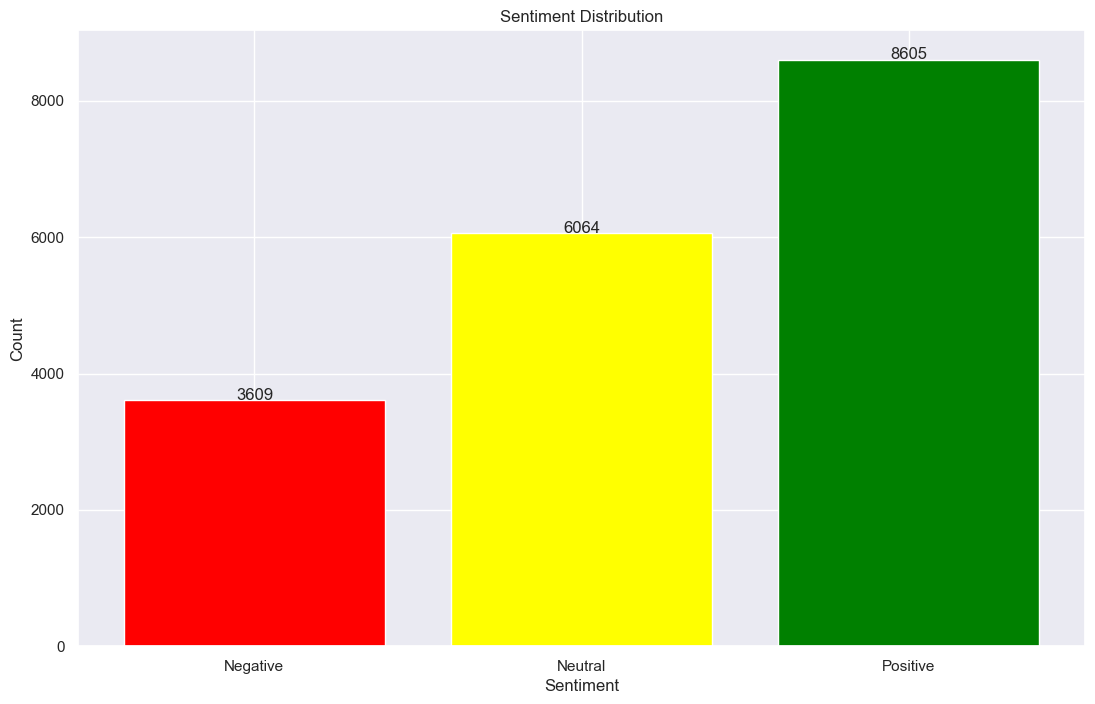

In [84]:
category_counts = df.groupby(['category']).count()['tweet_lemmatized']

# Define colors for each sentiment category
colors = {'Negative': 'red', 'Neutral': 'yellow', 'Positive': 'green'}

# Create a bar plot
fig, ax = plt.subplots()
for category, count in category_counts.items():
    ax.bar(category, count, color=colors[category], label=sentiment)
    ax.text(category, count+5, str(count), ha='center')

ax.set_title('Sentiment Distribution')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
plt.show()

In [85]:
df_senti = df.groupby(['date'])['sentiment'].mean().reset_index(name='mean_sentiment').set_index('date')

In [86]:
df_senti

,mean_sentiment
date,
2017-01-01,0.070606
2017-01-02,-0.142411
2017-01-03,0.167381
2017-01-04,0.065748
2017-01-05,0.081657
...,...
2022-04-07,0.114881
2022-04-08,-0.073214
2022-04-09,0.102976


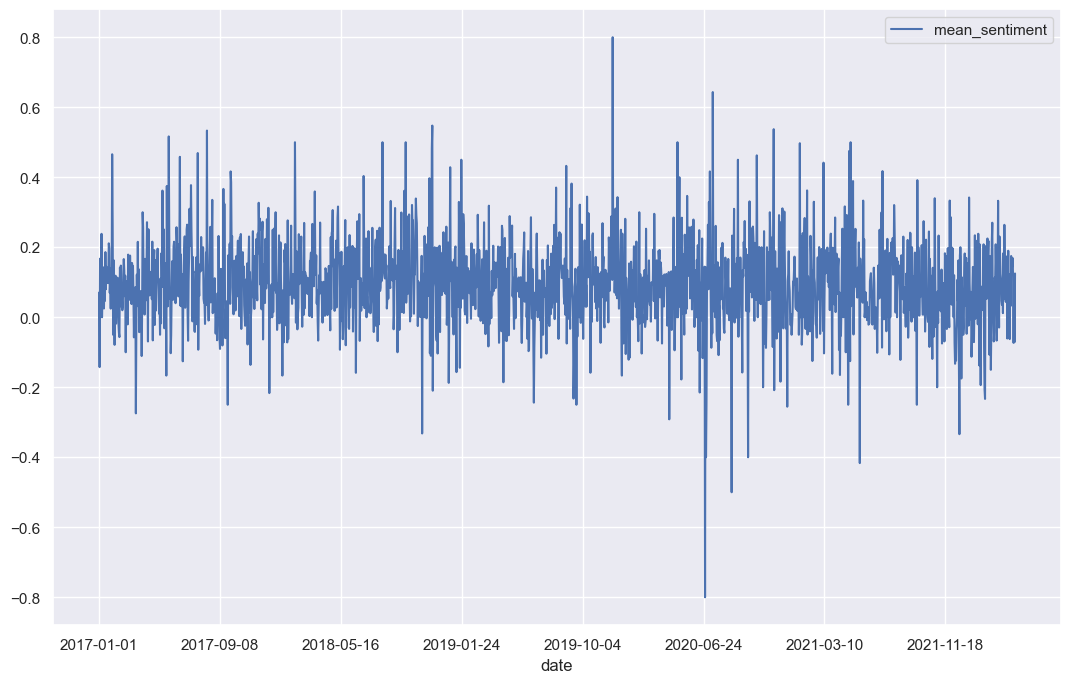

In [87]:
ax = df_senti.plot()
plt.savefig('temporal_sentiment_v2.png', dpi=800)

### Sentiment on Year

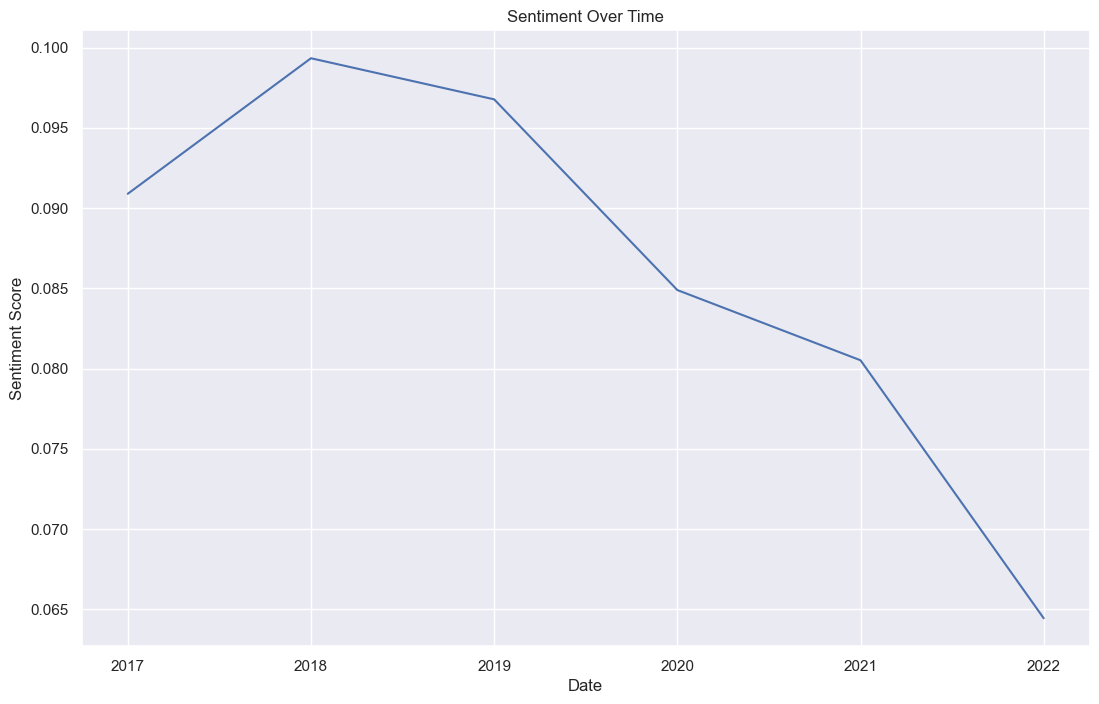

In [88]:
# convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# group the tweets by date and calculate the average sentiment score for each day
yr_sentiment = df.groupby('year')['sentiment'].mean().reset_index()

# plot the sentiment scores over time using a line chart
plt.plot(yr_sentiment['year'], yr_sentiment['sentiment'])
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Over Time')
plt.show()

### Sentiment on Month

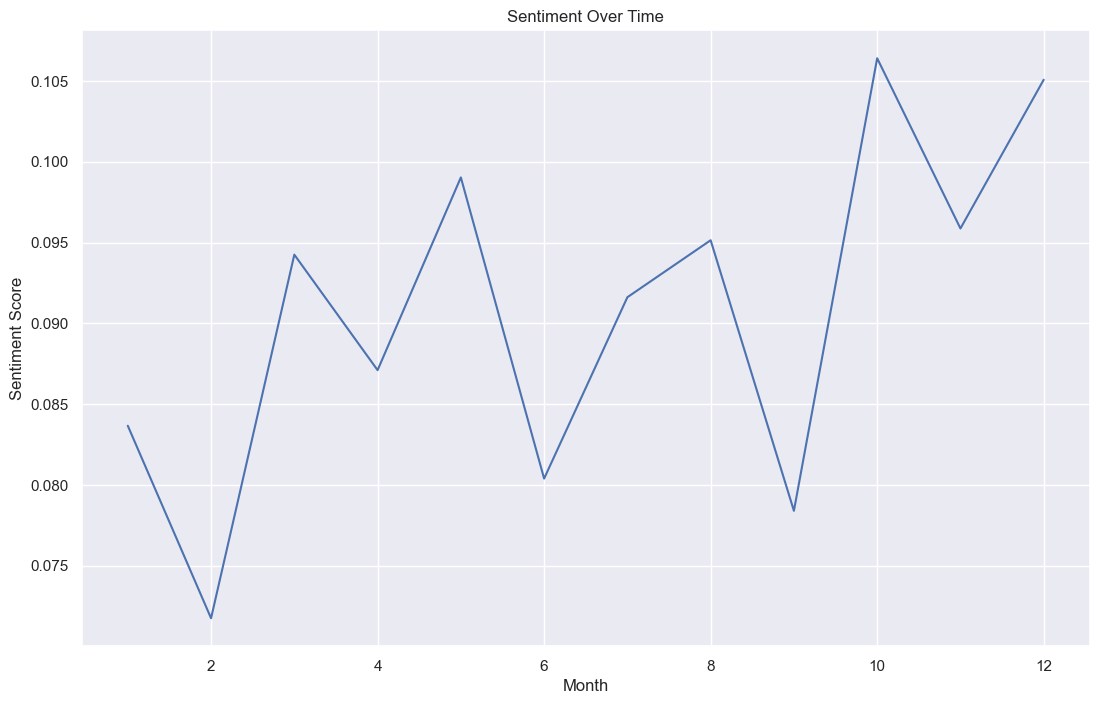

In [89]:
# convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# extract the year from the 'date' column and create a new 'year' column
df['month'] = df['date'].dt.month

# group the tweets by date and calculate the average sentiment score for each day
mth_sentiment = df.groupby('month')['sentiment'].mean().reset_index()

# plot the sentiment scores over time using a line chart
plt.plot(mth_sentiment['month'], mth_sentiment['sentiment'])
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Over Time')
plt.show()

# Topic Modelling

In [90]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "C:\Users\tangt\AppData\Local\Temp" will be used to save temporary dictionary and corpus.


In [92]:
corpus = list(df['tweet_lemmatized'])

In [93]:
corpus[:5]

['fraser government destroyed original liberal philosophically opposed universal heathcare system cannot trusted maintaining',
 'actually whitlam made fraser done worst wa resurrected hawke medicare',
 'fair green labor problem dental medicare ha always refusal dentist participate dental wa part original plan dentist simply refused part nothing ha changed libs dont care course',
 'actually greg labor invented pb year ago pm curtin gough whitlams labor govt invented libs closed labor reinvented hawke medicare amp hero howard declared amp libs sworn enemy universal health care',
 'dont education medicare nbn slow expensive obsolete kevin']

In [94]:
text = [[word for word in str(document).split()] for document in corpus]

In [82]:
text[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['fraser',
  'government',
  'destroyed',
  'original',
  'liberals',
  'philosophically',
  'opposed',
  'universal',
  'heathcare',
  'system',
  'cannot',
  'trusted',
  'maintaining'],
 ['actually',
  'whitlam',
  'made',
  'fraser',
  'had',
  'done',
  'worst',
  'resurrected',
  'hawke',
  'medicare'],
 ['fair',
  'greens',
  'labor',
  'problem',
  'dental',
  'medicare',
  'has',
  'always',
  'refusal',
  'dentists',
  'participate',
  'dental',
  'part',
  'original',
  'plan',
  'dentists',
  'simply',
  'refused',
  'part',
  'nothing',
  'has',
  'changed',
  'libs',
  'dont',
  'care',
  'course'],
 ['actually',
  'greg',
  'labor',
  'invented',
  'pbs',
  'years',
  'ago',
  'pm',
  'curtin',
  'gough',
  'whitlams',
  'labor',
  'govt',
  'invented',
  'libs',
  'closed',
  'labor',
  'reinvented',
  'hawke',
  'medicare',
  'amp',
  'hero',
  'howard',
  'declared',
  'amp',
  'libs',
  'sworn',
  'enemies',
  'universal',
  'health',
  'care'],
 ['dont',
  'educati

In [95]:
# Create a dictionary based on the tokanized words of all the tweets.
dictionary = corpora.Dictionary(text)

# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(TEMP_FOLDER, 'dict'))

2024-06-24 12:37:28,857 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-06-24 12:37:29,056 : INFO : adding document #10000 to Dictionary<16132 unique tokens: ['cannot', 'destroyed', 'fraser', 'government', 'heathcare']...>
2024-06-24 12:37:29,187 : INFO : built Dictionary<21779 unique tokens: ['cannot', 'destroyed', 'fraser', 'government', 'heathcare']...> from 18278 documents (total 252828 corpus positions)
2024-06-24 12:37:29,187 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<21779 unique tokens: ['cannot', 'destroyed', 'fraser', 'government', 'heathcare']...> from 18278 documents (total 252828 corpus positions)", 'datetime': '2024-06-24T12:37:29.187325', 'gensim': '4.3.0', 'python': '3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'created'}
2024-06-24 12:37:29,187 : INFO : Dictionary lifecycle event {'fname_or_handle': 'C:\\Users\\tangt\\AppData\\Lo

In [96]:
print(text[0])
print('alphabetically sorted', sorted(text[0]))

['fraser', 'government', 'destroyed', 'original', 'liberal', 'philosophically', 'opposed', 'universal', 'heathcare', 'system', 'cannot', 'trusted', 'maintaining']
alphabetically sorted ['cannot', 'destroyed', 'fraser', 'government', 'heathcare', 'liberal', 'maintaining', 'opposed', 'original', 'philosophically', 'system', 'trusted', 'universal']


In [97]:
print(text[1])
print('alphabetically sorted', sorted(text[1]))

['actually', 'whitlam', 'made', 'fraser', 'done', 'worst', 'wa', 'resurrected', 'hawke', 'medicare']
alphabetically sorted ['actually', 'done', 'fraser', 'hawke', 'made', 'medicare', 'resurrected', 'wa', 'whitlam', 'worst']


In [98]:
print(dictionary.token2id)

{'cannot': 0, 'destroyed': 1, 'fraser': 2, 'government': 3, 'heathcare': 4, 'liberal': 5, 'maintaining': 6, 'opposed': 7, 'original': 8, 'philosophically': 9, 'system': 10, 'trusted': 11, 'universal': 12, 'actually': 13, 'done': 14, 'hawke': 15, 'made': 16, 'medicare': 17, 'resurrected': 18, 'wa': 19, 'whitlam': 20, 'worst': 21, 'always': 22, 'care': 23, 'changed': 24, 'course': 25, 'dental': 26, 'dentist': 27, 'dont': 28, 'fair': 29, 'green': 30, 'ha': 31, 'labor': 32, 'libs': 33, 'nothing': 34, 'part': 35, 'participate': 36, 'plan': 37, 'problem': 38, 'refusal': 39, 'refused': 40, 'simply': 41, 'ago': 42, 'amp': 43, 'closed': 44, 'curtin': 45, 'declared': 46, 'enemy': 47, 'gough': 48, 'govt': 49, 'greg': 50, 'health': 51, 'hero': 52, 'howard': 53, 'invented': 54, 'pb': 55, 'pm': 56, 'reinvented': 57, 'sworn': 58, 'whitlams': 59, 'year': 60, 'education': 61, 'expensive': 62, 'kevin': 63, 'nbn': 64, 'obsolete': 65, 'slow': 66, 'amazing': 67, 'bent': 68, 'demon': 69, 'eating': 70, 'enti

In [99]:
corpus = [dictionary.doc2bow(t) for t in text]

In [100]:
tweet_id = 0
print(text[tweet_id]) # each tweet converted to tokens
print(dictionary.doc2bow(text[tweet_id])) # each token is represented as a id from a dictionary

['fraser', 'government', 'destroyed', 'original', 'liberal', 'philosophically', 'opposed', 'universal', 'heathcare', 'system', 'cannot', 'trusted', 'maintaining']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


### Generate the Topic Model

In [101]:
tfidf = models.TfidfModel(corpus)

2024-06-24 12:37:47,190 : INFO : collecting document frequencies
2024-06-24 12:37:47,191 : INFO : PROGRESS: processing document #0
2024-06-24 12:37:47,213 : INFO : PROGRESS: processing document #10000
2024-06-24 12:37:47,275 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 18278 documents and 21779 features (240666 matrix non-zeros)', 'datetime': '2024-06-24T12:37:47.275992', 'gensim': '4.3.0', 'python': '3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'initialize'}


In [102]:
corpus_tfidf = tfidf[corpus]

In [103]:
total_topics = 10

In [104]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

2024-06-24 12:37:53,700 : INFO : using symmetric alpha at 0.1
2024-06-24 12:37:53,701 : INFO : using symmetric eta at 0.1
2024-06-24 12:37:53,705 : INFO : using serial LDA version on this node
2024-06-24 12:37:53,732 : INFO : running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 18278 documents, updating model once every 2000 documents, evaluating perplexity every 18278 documents, iterating 50x with a convergence threshold of 0.001000
2024-06-24 12:37:53,733 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-06-24 12:37:53,733 : INFO : PROGRESS: pass 0, at document #2000/18278
2024-06-24 12:37:54,666 : INFO : merging changes from 2000 documents into a model of 18278 documents
2024-06-24 12:37:54,690 : INFO : topic #2 (0.100): 0.011*"u" + 0.010*"ha" + 0.009*"medicare" + 0.009*"private" + 0.007*"health" + 0.007*"im" + 0.007*"get" + 0.006*"fraser" + 0.006*"not" + 0.0

In [105]:
# Print the Keyword in the 10 topics
lda.show_topics(total_topics, num_words=6)

[(0,
  '0.017*"health" + 0.016*"free" + 0.016*"class" + 0.015*"feelgoodprogram" + 0.014*"ceo" + 0.014*"better"'),
 (1,
  '0.029*"health" + 0.022*"year" + 0.021*"premium" + 0.017*"private" + 0.016*"increase" + 0.016*"profit"'),
 (2,
  '0.045*"u" + 0.037*"dm" + 0.035*"send" + 0.033*"please" + 0.029*"detail" + 0.023*"help"'),
 (3,
  '0.023*"thanks" + 0.021*"replied" + 0.016*"message" + 0.014*"day" + 0.012*"anna" + 0.012*"get"'),
 (4,
  '0.025*"amp" + 0.014*"wa" + 0.014*"ausbiz" + 0.011*"private" + 0.009*"court" + 0.008*"ha"'),
 (5,
  '0.018*"tip" + 0.017*"wa" + 0.010*"friend" + 0.009*"medicare" + 0.009*"not" + 0.008*"want"'),
 (6,
  '0.018*"wa" + 0.014*"tennis" + 0.013*"parkrun" + 0.013*"marathon" + 0.011*"cooking" + 0.011*"melbourne"'),
 (7,
  '0.035*"health" + 0.028*"insurance" + 0.023*"private" + 0.013*"cover" + 0.010*"member" + 0.010*"hospital"'),
 (8,
  '0.025*"health" + 0.021*"wa" + 0.021*"amp" + 0.020*"medicare" + 0.019*"private" + 0.014*"auspol"'),
 (9,
  '0.026*"thank" + 0.024*"d

For example, a topic is represented as 0.024*"health" + 0.017*"private" + 0.013*"not" + 0.010*"cover" + 0.009*"amp" + 0.008*"time"

Based on the keywords in the topic and their weights, we can summarize it as the problem of a private health that is not covered.

Or, another example is 0.037*"free" + 0.024*"feelgoodprogram" + 0.019*"parkrun" + 0.013*"fitness" + 0.011*"get" + 0.010*"legend".

This may be assumed as the free parkrun program receiving good feedback from participants.

### Interactive Topic Analyzer

In [106]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
8       8.748775  55.164345       1        1  41.139608
2     -30.531084  36.964848       2        1  13.122108
3      41.743237  22.830471       3        1   7.933039
5       5.693314  20.797867       4        1   5.443772
6     -20.319315  -1.042745       5        1   5.395737
4      11.675593 -12.676044       6        1   5.394585
9      46.576664 -17.394785       7        1   5.393088
1      11.364888 -47.800129       8        1   5.392812
0     -54.793377   0.723310       9        1   5.392672
7     -27.603443 -36.524109      10        1   5.392579, topic_info=       Term        Freq       Total Category  logprob  loglift
51   health  287.000000  287.000000  Default  30.0000  30.0000
359      dm  121.000000  121.000000  Default  29.0000  29.0000
111       u  177.000000  177.000000  Default  28.0000  28.0000
438    send  100.000000  100.000000  Default  27.0000  27.0000
364  please  107.000000  107.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
685   extra    4.269754   15.291064  Topic10  -5.4418   1.6444
396    much    4.768327   33.518795  Topic10  -5.3313   0.9700
187    make    4.911968   47.215695  Topic10  -5.3016   0.6571
31       ha    4.801350   74.303535  Topic10  -5.3244   0.1809
241    time    4.417722   54.335046  Topic10  -5.4077   0.4106

[695 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
3241       1  0.906238    1st
3241       5  0.069711    1st
5360       9  0.913237  530pm
19338      9  1.047962  545pm
2807       2  1.068603    8am
...      ...       ...    ...
857        1  0.341833  youre
857        2  0.256375  youre
857        3  0.227889  youre
857        8  0.085458  youre
857       10  0.028486  youre

[1328 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 4, 6, 7, 5, 10, 2, 1, 8])